In [1]:
%matplotlib inline

morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'

In [2]:
def get_snapshot_fname(redshift):
    
    basename_z0p00 = "umachine_color_mock_v4_m000-499.hdf5"
    basename_z0p25 = "umachine_color_mock_v4_m000-392.hdf5"
    basename_z0p50 = "umachine_color_mock_v4_m000-331.hdf5"
    basename_z0p75 = "umachine_color_mock_v4_m000-286.hdf5"
    basename_z1p00 = "umachine_color_mock_v4_m000-253.hdf5"
    
    if redshift == 0.0:
        basename = basename_z0p00
    elif redshift == 0.25:
        basename = basename_z0p25
    elif redshift == 0.5:
        basename = basename_z0p50
    elif redshift == 0.75:
        basename = basename_z0p75
    elif redshift == 1.0:
        basename = basename_z1p00
    else:
        raise ValueError("Redshift not found")
    return basename


In [3]:
import os

from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
print(sdss.keys())


logsm_cut = 8
Lbox = 256.

import os
dirname = "/Volumes/simulation_data_2018/protoDC2_v4"
redshift = 0.0
basename = get_snapshot_fname(redshift)
fname = os.path.join(dirname, basename)

from astropy.table import Table
mock = Table.read(fname, path='data')
mock['redshift'] = redshift
mock.rename_column('restframe_extincted_sdss_abs_magr', 'um_mag_r_rest')
mock.rename_column('restframe_extincted_sdss_gr', 'um_gr_rest')
mock.rename_column('restframe_extincted_sdss_ri', 'um_ri_rest')
mock['um_mag_g_rest'] = mock['um_gr_rest'] + mock['um_mag_r_rest']
mock = mock[mock['obs_sm'] > 10**logsm_cut]

print(mock.keys())

Lbox_physical = Lbox/(1. + redshift)
mock.Veff = Lbox_physical**3.

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'restframe_extincted_sdss_abs_magr', 'restframe_extincted_sdss_gr', 'restframe_extincted_sdss_ri', 'size_kpc', 'dr7_PhotoObj_Table_ID', 'sfr_percentile_fixed_sm', 'gr_percentile_fixed_magr']
['source_halo_id', 'target_halo_id', 'target_halo_x', 'target_halo_y', 'target_halo_z', 'target_halo_vx', 'target_halo_vy', 'target_halo_vz', 'target_halo_mass', 'host_halo_mvir', 'upid', 'mpeak', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sm', 'obs_sfr', 'sfr_percentile', 'um_mag_r_rest', 'um_gr_rest', 'um_ri_rest', 'is_on_red_sequence_gr', 'is_on_red_sequence_ri', 'x', 'vx', 'y', 'vy', 'z', 'vz', 'lightcone_id', 'redshift', 'um_mag_g_rest']


In [4]:
# import os
# dirname = "/Volumes/simulation_data_2018/protoDC2_v4"
# redshift = 0.5
# basename = get_snapshot_fname(redshift)
# fname = os.path.join(dirname, basename)

# from astropy.table import Table
# mock_0p5 = Table.read(fname, path='data')
# mock_0p5['redshift'] = redshift
# mock_0p5.rename_column('restframe_extincted_sdss_abs_magr', 'um_mag_r_rest')
# mock_0p5.rename_column('restframe_extincted_sdss_gr', 'um_gr_rest')
# mock_0p5.rename_column('restframe_extincted_sdss_ri', 'um_ri_rest')
# mock_0p5['um_mag_g_rest'] = mock_0p5['um_gr_rest'] + mock_0p5['um_mag_r_rest']
# mock_0p5 = mock_0p5[mock_0p5['obs_sm'] > 10**logsm_cut]

# print(mock_0p5.keys())

# Lbox_physical = Lbox/(1. + redshift)
# mock_0p5.Veff = Lbox_physical**3.

In [5]:
import os
dirname = "/Volumes/simulation_data_2018/protoDC2_v4"
redshift = 1.0
basename = get_snapshot_fname(redshift)
fname = os.path.join(dirname, basename)

from astropy.table import Table
mock_1p0 = Table.read(fname, path='data')
mock_1p0['redshift'] = redshift
mock_1p0.rename_column('restframe_extincted_sdss_abs_magr', 'um_mag_r_rest')
mock_1p0.rename_column('restframe_extincted_sdss_gr', 'um_gr_rest')
mock_1p0.rename_column('restframe_extincted_sdss_ri', 'um_ri_rest')
mock_1p0['um_mag_g_rest'] = mock_1p0['um_gr_rest'] + mock_1p0['um_mag_r_rest']
mock_1p0 = mock_1p0[mock_1p0['obs_sm'] > 10**logsm_cut]

print(mock_1p0.keys())

Lbox_physical = Lbox/(1. + redshift)
mock_1p0.Veff = Lbox_physical**3.

['source_halo_id', 'target_halo_id', 'target_halo_x', 'target_halo_y', 'target_halo_z', 'target_halo_vx', 'target_halo_vy', 'target_halo_vz', 'target_halo_mass', 'host_halo_mvir', 'upid', 'mpeak', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sm', 'obs_sfr', 'sfr_percentile', 'um_mag_r_rest', 'um_gr_rest', 'um_ri_rest', 'is_on_red_sequence_gr', 'is_on_red_sequence_ri', 'x', 'vx', 'y', 'vy', 'z', 'vz', 'lightcone_id', 'redshift', 'um_mag_g_rest']


In [6]:
from cosmodc2.stellar_mass_remapping import lift_high_mass_mstar

new_mstar = lift_high_mass_mstar(
        mock['mpeak'], mock['obs_sm'], mock['upid'],  mock['redshift'])
mock['new_mstar'] = new_mstar
    
from cosmodc2.sdss_colors import magr_monte_carlo
mock['new_um_mag_r_rest'] = magr_monte_carlo(
    mock['new_mstar'], mock['upid'], mock['redshift'])
mock['new2_um_mag_r_rest'] = magr_monte_carlo(
    mock['new_mstar'], mock['upid'], mock['redshift'])


In [7]:
new_mstar = lift_high_mass_mstar(
        mock_1p0['mpeak'], mock_1p0['obs_sm'], mock_1p0['upid'],  mock_1p0['redshift'])
mock_1p0['new_mstar'] = new_mstar
    
from cosmodc2.sdss_colors import magr_monte_carlo
mock_1p0['new_um_mag_r_rest'] = magr_monte_carlo(
    mock_1p0['new_mstar'], mock_1p0['upid'], mock_1p0['redshift'])
mock_1p0['new2_um_mag_r_rest'] = magr_monte_carlo(
    mock_1p0['new_mstar'], mock_1p0['upid'], mock_1p0['redshift'])


In [8]:
from cosmodc2.sdss_colors import gr_ri_monte_carlo

gr, ri, is_quiescent_ri, is_quiescent_gr = gr_ri_monte_carlo(
    mock['new_um_mag_r_rest'], mock['sfr_percentile'], mock['redshift'])
mock['new_um_gr_rest'] = gr
mock['new_um_ri_rest'] = ri
mock['new_um_is_quiescent_gr'] = is_quiescent_gr
mock['new_um_is_quiescent_ri'] = is_quiescent_ri

#  blueshift_factor_table_gr=(1., 2., 4.)
gr, ri, is_quiescent_ri, is_quiescent_gr = gr_ri_monte_carlo(
    mock['new_um_mag_r_rest'], mock['sfr_percentile'], mock['redshift'],
    blueshift_factor_table_gr=(1., 2., 4.), blueshift_factor_table_ri=(1., 2., 4.))
mock['new2_um_gr_rest'] = gr
mock['new2_um_ri_rest'] = ri
mock['new2_um_is_quiescent_gr'] = is_quiescent_gr
mock['new2_um_is_quiescent_ri'] = is_quiescent_ri


In [9]:
gr, ri, is_quiescent_ri, is_quiescent_gr = gr_ri_monte_carlo(
    mock_1p0['new_um_mag_r_rest'], mock_1p0['sfr_percentile'], mock_1p0['redshift'])
mock_1p0['new_um_gr_rest'] = gr
mock_1p0['new_um_ri_rest'] = ri
mock_1p0['new_um_is_quiescent_gr'] = is_quiescent_gr
mock_1p0['new_um_is_quiescent_ri'] = is_quiescent_ri

#  blueshift_factor_table_gr=(1., 2., 4.)
gr, ri, is_quiescent_ri, is_quiescent_gr = gr_ri_monte_carlo(
    mock_1p0['new_um_mag_r_rest'], mock_1p0['sfr_percentile'], mock_1p0['redshift'],
    blueshift_factor_table_gr=(1., 2., 4.), blueshift_factor_table_ri=(1., 2., 4.))
mock_1p0['new2_um_gr_rest'] = gr
mock_1p0['new2_um_ri_rest'] = ri
mock_1p0['new2_um_is_quiescent_gr'] = is_quiescent_gr
mock_1p0['new2_um_is_quiescent_ri'] = is_quiescent_ri

In [10]:
print(mock.keys())

['source_halo_id', 'target_halo_id', 'target_halo_x', 'target_halo_y', 'target_halo_z', 'target_halo_vx', 'target_halo_vy', 'target_halo_vz', 'target_halo_mass', 'host_halo_mvir', 'upid', 'mpeak', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sm', 'obs_sfr', 'sfr_percentile', 'um_mag_r_rest', 'um_gr_rest', 'um_ri_rest', 'is_on_red_sequence_gr', 'is_on_red_sequence_ri', 'x', 'vx', 'y', 'vy', 'z', 'vz', 'lightcone_id', 'redshift', 'um_mag_g_rest', 'new_mstar', 'new_um_mag_r_rest', 'new2_um_mag_r_rest', 'new_um_gr_rest', 'new_um_ri_rest', 'new_um_is_quiescent_gr', 'new_um_is_quiescent_ri', 'new2_um_gr_rest', 'new2_um_ri_rest', 'new2_um_is_quiescent_gr', 'new2_um_is_quiescent_ri']


In [11]:
# mag_r_mask1 = mock['new_um_mag_r_rest'] < -19
# mag_r_mask1 *= mock['new_um_mag_r_rest'] >= -20

# mag_r_mask1_1p0 = mock_1p0['new_um_mag_r_rest'] < -20
# mag_r_mask1_1p0 *= mock_1p0['new_um_mag_r_rest'] >= -21

# fig, ax = plt.subplots(1, 1)


# gr_bins = np.linspace(0, 1.25, 50)
# __=ax.hist(mock['new_um_gr_rest'][mag_r_mask1], normed=True, bins=gr_bins, 
#           alpha=0.9, color=morange)
# __=ax.hist(mock_1p0['new_um_gr_rest'][mag_r_mask1_1p0], normed=True, bins=gr_bins, 
#           alpha=0.9, color=mblue)

In [12]:
# mag_r_mask1 = mock['new_um_mag_r_rest'] < -19
# mag_r_mask1 *= mock['new_um_mag_r_rest'] >= -20

# mag_r_mask1_1p0 = mock_1p0['new_um_mag_r_rest'] < -20
# mag_r_mask1_1p0 *= mock_1p0['new_um_mag_r_rest'] >= -21

# fig, ax = plt.subplots(1, 1)


# ri_bins = np.linspace(0, 0.85, 100)
# __=ax.hist(mock['new_um_ri_rest'][mag_r_mask1], normed=True, bins=ri_bins, 
#           alpha=0.9, color=morange)
# __=ax.hist(mock_1p0['new_um_ri_rest'][mag_r_mask1_1p0], normed=True, bins=ri_bins, 
#           alpha=0.9, color=mblue)
# xlim = ax.set_xlim(0, 0.6)

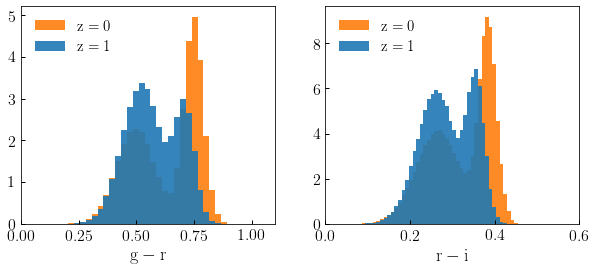

In [13]:
mag_r_mask1 = mock['new_um_mag_r_rest'] < -19
mag_r_mask1 *= mock['new_um_mag_r_rest'] >= -20

mag_r_mask1_1p0 = mock_1p0['new_um_mag_r_rest'] < -20
mag_r_mask1_1p0 *= mock_1p0['new_um_mag_r_rest'] >= -21

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


gr_bins = np.linspace(0, 1.25, 50)
__=ax1.hist(mock['new_um_gr_rest'][mag_r_mask1], normed=True, bins=gr_bins, 
          alpha=0.9, color=morange, label=r'${\rm z=0}$')
__=ax1.hist(mock_1p0['new_um_gr_rest'][mag_r_mask1_1p0], normed=True, bins=gr_bins, 
          alpha=0.9, color=mblue, label=r'${\rm z=1}$')

ri_bins = np.linspace(0, 0.85, 100)
__=ax2.hist(mock['new_um_ri_rest'][mag_r_mask1], normed=True, bins=ri_bins, 
          alpha=0.9, color=morange, label=r'${\rm z=0}$')
__=ax2.hist(mock_1p0['new_um_ri_rest'][mag_r_mask1_1p0], normed=True, bins=ri_bins, 
          alpha=0.9, color=mblue, label=r'${\rm z=1}$')

xlim1 = ax1.set_xlim(0, 1.1)
xlim2 = ax2.set_xlim(0, 0.6)

xlabel1 = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm r-i}$')

legend1 = ax1.legend()
legend2 = ax2.legend()

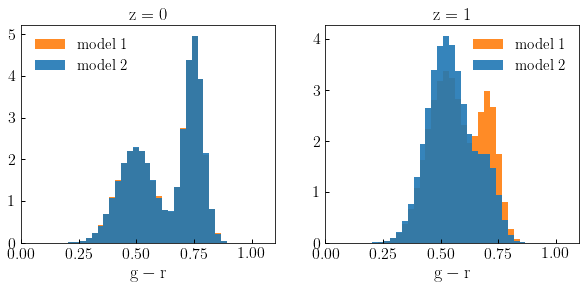

In [14]:
mag_r_mask1 = mock['new_um_mag_r_rest'] < -19
mag_r_mask1 *= mock['new_um_mag_r_rest'] >= -20

mag_r_mask1_1p0 = mock_1p0['new_um_mag_r_rest'] < -20
mag_r_mask1_1p0 *= mock_1p0['new_um_mag_r_rest'] >= -21

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


gr_bins = np.linspace(0, 1.25, 50)
__=ax1.hist(mock['new_um_gr_rest'][mag_r_mask1], normed=True, bins=gr_bins, 
          alpha=0.9, color=morange, label=r'${\rm model\ 1}$')
__=ax1.hist(mock['new2_um_gr_rest'][mag_r_mask1], normed=True, bins=gr_bins, 
          alpha=0.9, color=mblue, label=r'${\rm model\ 2}$')
title1 = ax1.set_title(r'${\rm z=0}$')

ri_bins = np.linspace(0, 0.85, 100)
__=ax2.hist(mock_1p0['new_um_gr_rest'][mag_r_mask1_1p0], normed=True, bins=gr_bins, 
          alpha=0.9, color=morange, label=r'${\rm model\ 1}$')
__=ax2.hist(mock_1p0['new2_um_gr_rest'][mag_r_mask1_1p0], normed=True, bins=gr_bins, 
          alpha=0.9, color=mblue, label=r'${\rm model\ 2}$')
title2 = ax2.set_title(r'${\rm z=1}$')

xlim1 = ax1.set_xlim(0, 1.1)
xlim2 = ax2.set_xlim(0, 1.1)

xlabel1 = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm g-r}$')

legend1 = ax1.legend()
legend2 = ax2.legend()

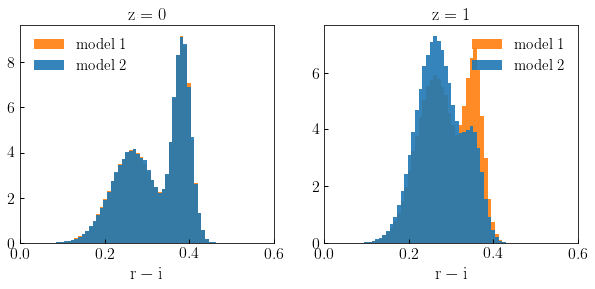

In [15]:
mag_r_mask1 = mock['new_um_mag_r_rest'] < -19
mag_r_mask1 *= mock['new_um_mag_r_rest'] >= -20

mag_r_mask1_1p0 = mock_1p0['new_um_mag_r_rest'] < -20
mag_r_mask1_1p0 *= mock_1p0['new_um_mag_r_rest'] >= -21

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


gr_bins = np.linspace(0, 1.25, 50)
__=ax1.hist(mock['new_um_ri_rest'][mag_r_mask1], normed=True, bins=ri_bins, 
          alpha=0.9, color=morange, label=r'${\rm model\ 1}$')
__=ax1.hist(mock['new2_um_ri_rest'][mag_r_mask1], normed=True, bins=ri_bins, 
          alpha=0.9, color=mblue, label=r'${\rm model\ 2}$')
title1 = ax1.set_title(r'${\rm z=0}$')

ri_bins = np.linspace(0, 0.85, 100)
__=ax2.hist(mock_1p0['new_um_ri_rest'][mag_r_mask1_1p0], normed=True, bins=ri_bins, 
          alpha=0.9, color=morange, label=r'${\rm model\ 1}$')
__=ax2.hist(mock_1p0['new2_um_ri_rest'][mag_r_mask1_1p0], normed=True, bins=ri_bins, 
          alpha=0.9, color=mblue, label=r'${\rm model\ 2}$')
title2 = ax2.set_title(r'${\rm z=1}$')

xlim1 = ax1.set_xlim(0, 0.6)
xlim2 = ax2.set_xlim(0, 0.6)

xlabel1 = ax1.set_xlabel(r'${\rm r-i}$')
xlabel2 = ax2.set_xlabel(r'${\rm r-i}$')

legend1 = ax1.legend()
legend2 = ax2.legend()